# Thompson Sampling

## Importing the libraries

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [6]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing Thompson Sampling

In [15]:
import random
# numbers_of_rewards_0 : No. of times ad i got reward 0 upto round n
# numbers_of_rewards_1 : No. of times ad i got reward 1 upto round n
N = 200
d = 10
ads_selected = []
numbers_of_rewards_0 = [0]*d
numbers_of_rewards_1 = [0]*d
total_reward = 0

for n in range(0,N):
  chosen_ad = 0
  max_of_random_draws = 0
  for i in range(0,d):
    random_from_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
    if(random_from_beta > max_of_random_draws):
      max_of_random_draws = random_from_beta
      chosen_ad = i
  ads_selected.append(chosen_ad)
  reward = dataset.values[n,chosen_ad]
  if(reward == 1):
    numbers_of_rewards_1[chosen_ad] += 1
  else:
    numbers_of_rewards_0[chosen_ad] += 1
  total_reward += reward



## Visualising the results - Histogram

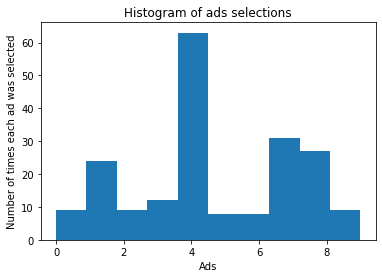

In [16]:
plt.hist(ads_selected)
plt.title('Histogram of ads')
plt.xlabel('Ads')
plt.ylabel('Number of times selected')
plt.show()